In [1]:
import numpy as np
import sfr_tomo as cib
import pyccl as ccl
import sacc
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.interpolate import interp1d
from scipy.linalg import block_diag
import emcee
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)

In [2]:
COSMO_P18 = {"Omega_c": 0.26066676,
             "Omega_b": 0.048974682,
             "h": 0.6766,
             "n_s": 0.9665,
             "sigma8": 0.8102}
cosmo = ccl.Cosmology(**COSMO_P18)

In [3]:
mdef = ccl.halos.MassDef200c()
cM = ccl.halos.ConcentrationDuffy08(mdef)
nM = ccl.halos.MassFuncTinker10(cosmo, mdef, norm_all_z=True)
bM = ccl.halos.HaloBiasTinker10(cosmo, mdef)
hmc = ccl.halos.HMCalculator(cosmo, nM, bM, mdef)

In [4]:
pr1 = cib.HaloProfileCIBM21(cosmo, cM, fsub=0.134, fast_integ=True, emerge=False)
pr2 = cib.HaloProfileCIBM21(cosmo, cM, fsub=0.134, fast_integ=True, emerge=True)


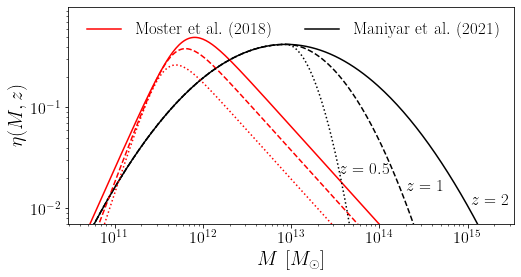

In [33]:
plt.figure(figsize=(8, 4))
zs = [0.5, 1.0, 2.0]
ms = np.geomspace(5E10, 2E15, 256)
for z, t in zip(zs[::-1], ['-', '--', ':']):
    eta1 = pr1._efficiency(ms, 1/(1+z))
    eta2 = pr2._efficiency(ms, 1/(1+z))
    plt.plot(ms, eta1, 'k'+t)
    plt.plot(ms, eta2, 'r'+t)
plt.plot([0, 0], [0, 0], 'r-', label=r'${\rm Moster\,\,et\,\,al.\,\,(2018)}$')
plt.plot([0, 0], [0, 0], 'k-', label=r'${\rm Maniyar\,\,et\,\,al.\,\,(2021)}$')
ax = plt.gca()
plt.text(3.5E13, 0.022, r'$z=0.5$', fontsize=17)#, transform=ax.transAxes)
plt.text(2.0E14, 0.015, r'$z=1$', fontsize=17)#, transform=ax.transAxes)
plt.text(1.1E15, 0.011, r'$z=2$', fontsize=17)#, transform=ax.transAxes)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$M\,\,[M_\odot]$', fontsize=20)
plt.ylabel(r'$\eta(M,z)$', fontsize=20)
plt.ylim([0.007, 0.99])
plt.ylim([0.007, 0.99])
plt.legend(ncol=3, frameon=False, fontsize=17)
plt.savefig("eta_models.pdf", bbox_inches='tight')

In [41]:
def maxs(z):
    t = z/(1+z)
    beta = pr2.beta0+pr2.betaz*t
    gamma = pr2.gamma0+pr2.gammaz*t
    xmax = (beta/gamma)**(1/(gamma+beta))
    etamax = xmax**beta*2*gamma/(gamma+beta)
    print(xmax, etamax)
maxs(0)
maxs(1)
maxs(2)
maxs(4)


1.3339055853269102 1.1747573105541216
1.3045364723996316 1.0900887073986356
1.2733181288517101 1.0604647762257067
1.2327617253034078 1.037613606046788
